# Penjelasan CRISP DM

# 1. Busniness Understanding

In [ ]:
Masalah :
Dunia Sepak Bola di Eropa sangat populer, kumpulan dataset ini berisi data sepak bola pada saat 6 Liga UEFA, 
dataset ini berisi tentang pengaruh apa saja di dunia sepak bola yaang membuat tim atau lawan 
bisa melakukan evaluasi di pertandingan selanjutnya, untuk itu saya analisis skor yang didapat dengan pengaruh yang ada seperti 
dari jumlah pertandingan,banyaknya kemenangan,banyaknya kekalahan, seri, gol dan point yang diharapkan ke gawang.

Dataset: 
Dataset yang saya peroleh dari kaggle.com "https://www.kaggle.com/datasets/slehkyi/extended-football-stats-for-european-leagues-xg"

Tujuannya analisis ini untuk mengestimasi jumlah skor dari 6 liga UEFA

# 2. Data Understanding

In [ ]:
Dataset ini berisi banayak sekali parameter yang berpengaruh terhadap skor gol,
saya mengambil parameter sesuai kebutuhan yaitu parameter :
Liga,Tahun,position,team,matches,wins,draws,loses,scored,missed.

Pada analisis ini menggunakan model Regresi Linear yang cocok dengan numerik (float/int)
Berikut himpunan data yang dipilih beserta tipe data:

 0   Liga      684 non-null    object
 1   Tahun     684 non-null    int64 
 2   position  684 non-null    int64 
 3   team      684 non-null    object
 4   matches   684 non-null    int64 
 5   wins      684 non-null    int64 
 6   draws     684 non-null    int64 
 7   loses     684 non-null    int64 
 8   scored    684 non-null    int64 
 9   missed    684 non-null    int64 
 10  xGA       684 non-null    object
 11  xpts      684 non-null    object
dtypes: int64(8), object(4)

sudah terlihat data numerik sebanyak 8, 
data itu akan dipakai dan diterapkan ke dalam model regresi linear

# 3. Data Preparation

In [ ]:
Pada tahap ketiga ini memastikan data yang tepat, 
dilakukain train/test split untuk pemisahan data dan data apa saja yang digunakan.
Lalu akan membuat feature dan label, yaitu : 

(x)feature = matches,wins,draws,loses,missed.
(y)label = scored

# 4. Modeling

In [ ]:
Pada analisis ini digunakan model regresi linear

# 5. Evaluation

In [ ]:
Pada tahap evaluasi setelah diterapkan model, lalu di uji tingkat akurasi, model cocok digunakan atau tidak.
Tingkat akurasi yang didapatkan adalah 87%, diatas 70% tingkat akurasi nya bisa dipercaya.

# 6. Deployment

In [ ]:
Setelah semua selsai, tahapan terakhir dalam crisp dm adalah deployment.
Saya deploy ke dalam streamlit.
Estimasi jumlah skor pada liga 6 UEFA siap digunakan.

# deskripsi library yang digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# memanggil dataset

In [3]:
df = pd.read_csv('liga.csv')

# deksripsi dataset

In [4]:
df.head()

,Liga,Tahun,position,team,matches,wins,draws,loses,scored,missed,xGA,xpts
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,"2,844,429,270,000,000","9,408,129,999,999,990"
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,"42,607,198,000,000,000","817,489"
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,"29,069,107,100,000,000","7,313,530,000,000,000"
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,"39,392,571,999,999,900","637,068"
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,"4,786,274,200,000,000","6,738,669,999,999,990"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Liga      684 non-null    object
 1   Tahun     684 non-null    int64 
 2   position  684 non-null    int64 
 3   team      684 non-null    object
 4   matches   684 non-null    int64 
 5   wins      684 non-null    int64 
 6   draws     684 non-null    int64 
 7   loses     684 non-null    int64 
 8   scored    684 non-null    int64 
 9   missed    684 non-null    int64 
 10  xGA       684 non-null    object
 11  xpts      684 non-null    object
dtypes: int64(8), object(4)
memory usage: 64.2+ KB


<Axes: >

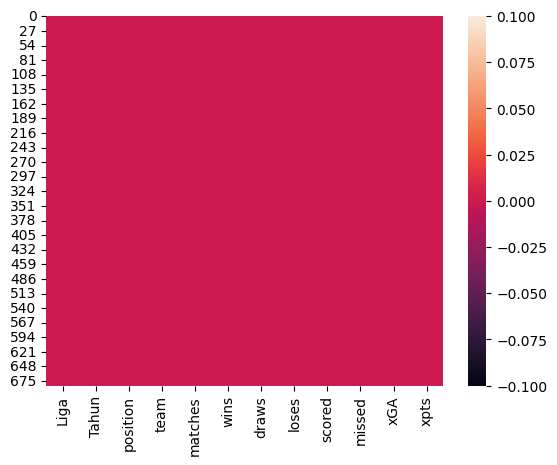

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,Tahun,position,matches,wins,draws,loses,scored,missed
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2016.500000,10.061404,35.935673,13.434211,9.067251,13.434211,48.190058,48.190058
std,1.709075,5.580165,3.203487,5.880962,2.941824,5.510278,17.605374,13.866509
min,2014.000000,1.000000,27.000000,2.000000,2.000000,1.000000,13.000000,15.000000
25%,2015.000000,5.000000,34.000000,9.000000,7.000000,9.000000,36.000000,38.000000
50%,2016.500000,10.000000,38.000000,12.000000,9.000000,14.000000,45.000000,48.000000
75%,2018.000000,15.000000,38.000000,16.000000,11.000000,17.000000,56.000000,58.000000
max,2019.000000,20.000000,38.000000,32.000000,18.000000,29.000000,118.000000,94.000000


# visualisasi data

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_10824\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

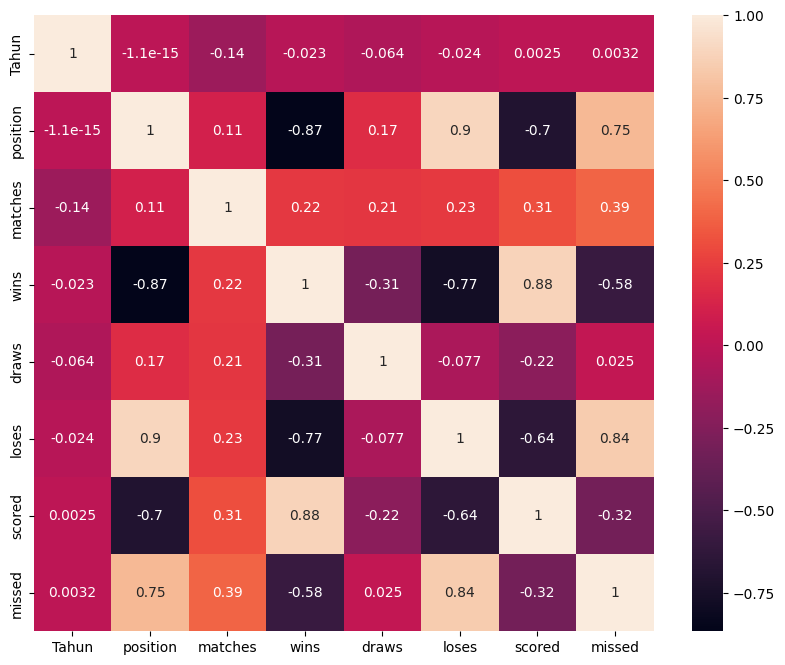

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# jumlah matches berdasarkan team

In [9]:
models = df.groupby('team').count()[['matches']].sort_values(by='matches',ascending=True).reset_index()
models = models.rename(columns={'matches':'number Of team'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167]),
 [Text(0, 0, 'Cardiff'),
  Text(1, 0, 'Middlesbrough')

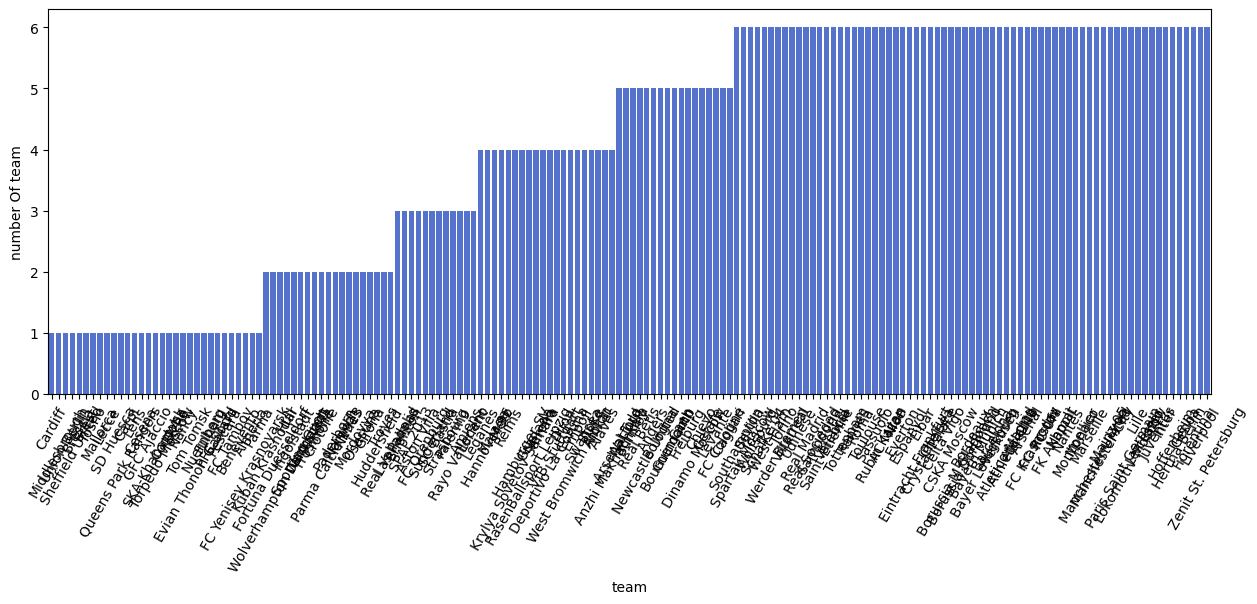

In [10]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['team'], y=models['number Of team'], color='royalblue')
plt.xticks(rotation=60)

# distribusi jumlah skor

C:\Users\Nurthariqa\AppData\Local\Temp\ipykernel_10824\2763037836.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scored'])


<Axes: xlabel='scored', ylabel='Density'>

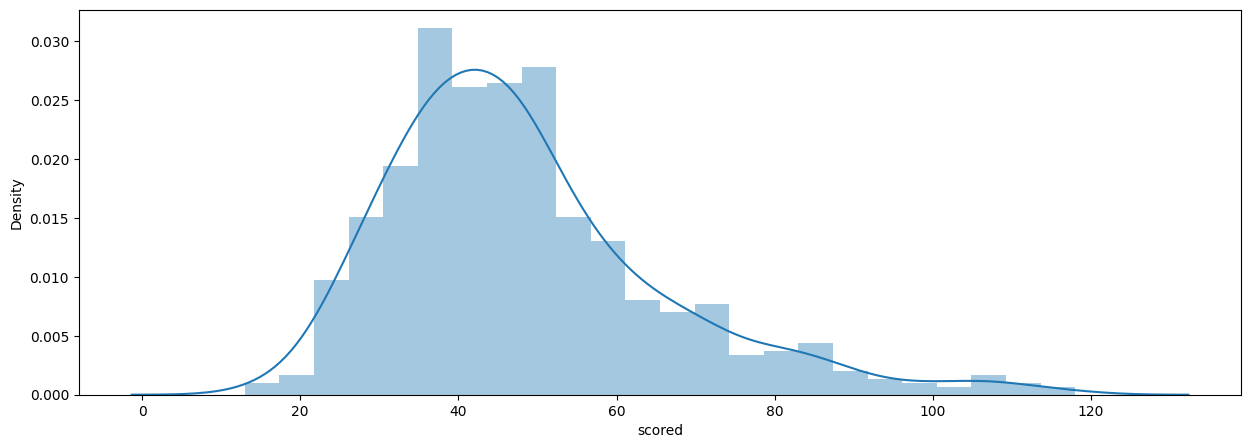

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(df['scored'])

# seleksi fitur

In [13]:
features = ['matches','wins','draws','loses','missed']
x = df[features]
y = df['scored']
x.shape, y.shape

((684, 5), (684,))

# split data training dan data testing

In [14]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(171,)

# membuat model regresi linear

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [16]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8742130330884965


# membuat inputan model regresi linear

In [17]:
#matches = 38, wins = 22, draws = 11, loses = 5 , mised = 21                                                                                                                                                                                                                                                                                     
input_data = np.array([[38,22,11,5,21]])

prediction = lr.predict(input_data)
print('Estimasi Jumlah Skor :', prediction)

Estimasi Jumlah Skor : [63.40134452]


c:\Users\Nurthariqa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [19]:
import pickle

filename = 'skor.sav'
pickle.dump(lr,open(filename,'wb'))